<a href="https://colab.research.google.com/github/Jeevesh28/Sales-Forecating/blob/main/Inter%20Hall%20Data%20Analytics%202021-22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing Libraries and Data:**

In [1]:
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout

In [3]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data Analytics (Inter Hall) 2021-22/interhall_train_data.xlsx')

In [4]:
print('Train data contains: ' + str(df.shape[0]) + ' rows and ' + str(df.shape[1]) + ' columns')

Train data contains: 1039 rows and 41 columns


In [5]:
df.columns = df.columns.astype(str)
df.columns = df.columns.str.replace('-01 00:00:00', '')

In [6]:
df.head()

,Warehouse id,Region,SKU id,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,...,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05
0,Wh-1,NORTH,SKU-1,27,13,30,14,22,8,8,...,12,8,8,8,8,8,14,16,8,12
1,Wh-1,NORTH,SKU-2,88,28,127,130,58,10,7,...,16,7,7,7,7,7,13,43,13,43
2,Wh-1,NORTH,SKU-3,6,6,6,6,6,6,6,...,8,6,6,6,6,6,6,8,26,6
3,Wh-1,NORTH,SKU-4,162,184,110,172,90,40,18,...,82,78,38,18,22,28,36,352,58,18
4,Wh-1,NORTH,SKU-5,171,402,627,615,300,417,141,...,468,216,75,6,30,66,141,699,183,24


In [7]:
df.describe()

,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,...,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05
count,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,...,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000
mean,248.102984,216.824832,209.153994,157.714148,174.883542,158.524543,161.719923,201.784408,212.032724,177.205967,...,213.336862,207.782483,238.777671,258.241578,388.457170,274.597690,275.120308,387.707411,150.856593,122.123195
std,785.750982,493.283000,480.078224,351.488015,450.706178,374.631088,376.697992,614.940984,766.657455,790.932939,...,498.147866,495.033144,552.393333,950.188944,1374.171617,805.756394,699.096181,1106.507945,420.741507,329.277995
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,9.000000,9.500000,10.000000,10.000000,9.000000,10.000000,9.000000,10.000000,10.000000,10.000000,...,17.000000,16.000000,19.000000,18.500000,30.500000,22.500000,32.000000,43.000000,18.000000,14.000000
50%,18.000000,19.000000,19.000000,18.000000,19.000000,19.000000,19.000000,19.000000,19.000000,20.000000,...,63.000000,60.000000,73.000000,67.000000,106.000000,77.000000,105.000000,129.000000,46.000000,33.000000
75%,191.000000,186.500000,192.500000,137.000000,128.000000,140.000000,127.500000,143.500000,170.000000,130.500000,...,186.000000,181.500000,215.000000,198.000000,297.500000,218.500000,254.000000,339.500000,133.000000,92.000000
max,17540.000000,5029.000000,5823.000000,3151.000000,6700.000000,4604.000000,3576.000000,10322.000000,18336.000000,19324.000000,...,6283.000000,6097.000000,7469.000000,18148.000000,30996.000000,12020.000000,11641.000000,16483.000000,9199.000000,4669.000000


### **Analyzing Data:**

*   **Region wise and SKU wise separation:**

In [8]:
unique_region = df['Region'].unique()
unique_id = df['SKU id'].unique()

In [9]:
north = df[df['Region'] == 'NORTH']
north.reset_index(inplace = True, drop = True)

east = df[df['Region'] == 'EAST']
east.reset_index(inplace = True, drop = True)

west = df[df['Region'] == 'WEST']
west.reset_index(inplace = True, drop = True)

south = df[df['Region'] == 'SOUTH']
south.reset_index(inplace = True, drop = True)

*   **SKUs which are not present in all 4 regions:**

In [10]:
c_id = 0
for id in unique_id:
  if(id not in north['SKU id'].values) or (id not in east['SKU id'].values) or (id not in west['SKU id'].values) or (id not in south['SKU id'].values):
    c_id += 1
print(c_id)

295


*   **Monthly sales region wise:**



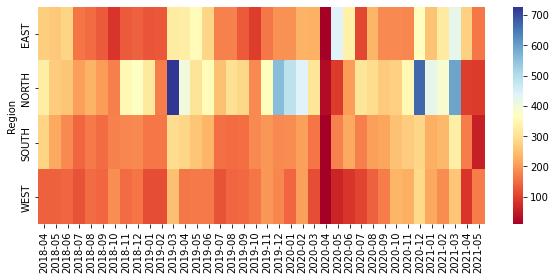

In [11]:
dfg = df.groupby(by = 'Region').mean()
plt.figure(figsize=(10, 4))
sns.heatmap(dfg, cmap = 'RdYlBu');

*   **Correlation of SKU-1 with same months and different regions:**

In [12]:
sku_1 = df[df['SKU id'] == 'SKU-1']
sku_1_april = sku_1.iloc[:, [3, 15, 27, 39]]
sku_1_april

,2018-04,2019-04,2020-04,2021-04
0,27,53,8,8
233,23,35,5,5
445,90,144,12,87
753,142,85,19,112


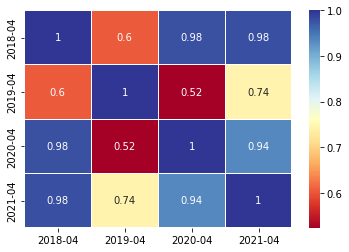

In [13]:
sns.heatmap(sku_1_april.corr(), cmap = 'RdYlBu', annot = True, linewidth = 0.1);

*   **Monthly sale of SKU-1 in NORTH region:**

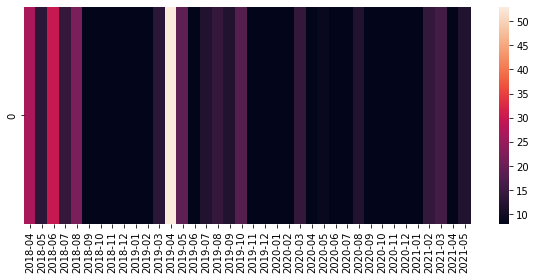

In [14]:
sku_1_n = sku_1[sku_1['Region'] == 'NORTH']
plt.figure(figsize=(10, 4))
sns.heatmap(sku_1_n.iloc[:, 3:]);

*   **Monthly sale of SKU-1 in EAST region:**

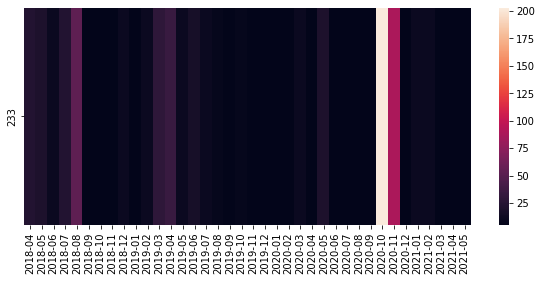

In [15]:
sku_1_e = sku_1[sku_1['Region'] == 'EAST']
plt.figure(figsize=(10, 4))
sns.heatmap(sku_1_e.iloc[:, 3:]);

*   **Monthly sale of SKU-1 in SOUTH region:**

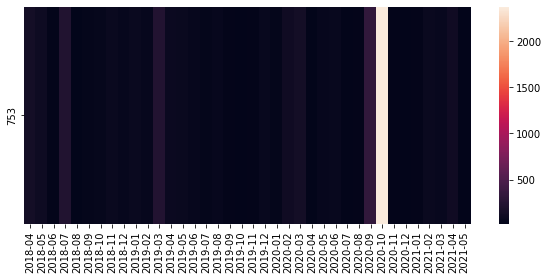

In [16]:
sku_1_s = sku_1[sku_1['Region'] == 'SOUTH']
plt.figure(figsize=(10, 4))
sns.heatmap(sku_1_s.iloc[:, 3:]);

*   **Monthly sale of SKU-1 in WEST region:**

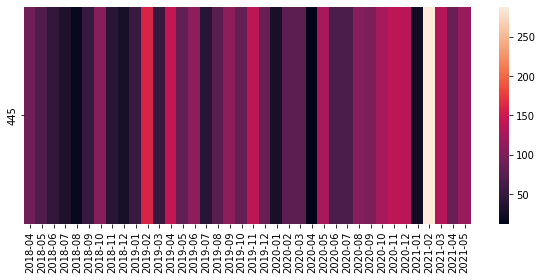

In [17]:
sku_1_w = sku_1[sku_1['Region'] == 'WEST']
plt.figure(figsize=(10, 4))
sns.heatmap(sku_1_w.iloc[:, 3:]);

In [18]:
df = df.iloc[:, 3:]

*   **Correlation Heatmap:**

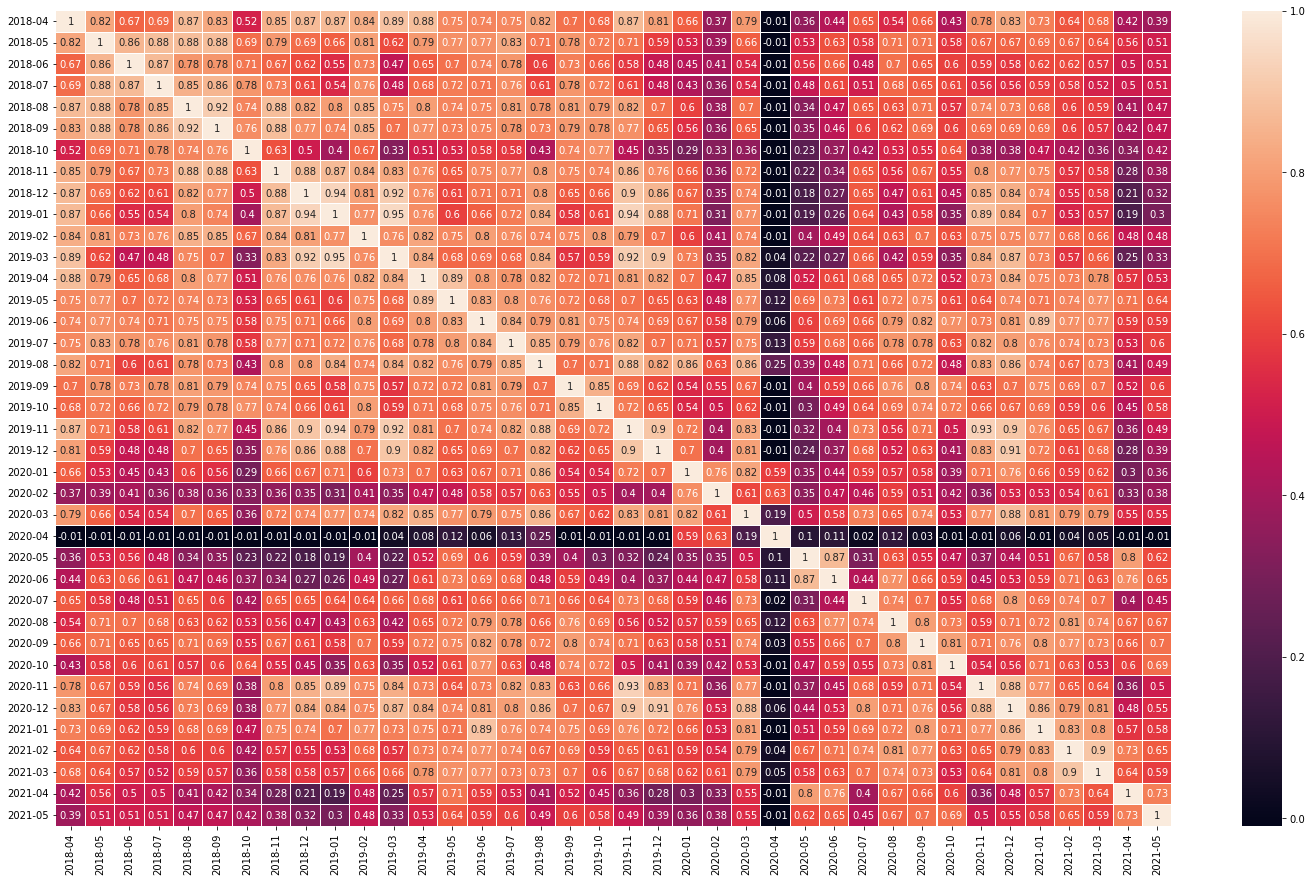

In [19]:
plt.figure(figsize=(25, 15))
sns.heatmap(round(df.corr(), 2), linewidth = 0.1, annot = True);

*   **Average percentage change in sales month-wise:**

In [20]:
av = df.pct_change(periods=1, axis=1);
print(f'The average percentage mean month-wise is:\n')
av.mean() * 100

The average percentage mean month-wise is:



2018-04            NaN
2018-05     105.235534
2018-06     108.006610
2018-07      64.220380
2018-08      61.085264
2018-09      88.047018
2018-10      36.896032
2018-11     116.214167
2018-12     281.352650
2019-01     110.621216
2019-02      47.392167
2019-03     433.825362
2019-04      34.385327
2019-05      59.851709
2019-06      60.433071
2019-07      40.522613
2019-08      68.706901
2019-09      89.303852
2019-10      53.570550
2019-11      82.206228
2019-12     200.632379
2020-01     787.398559
2020-02     139.150146
2020-03      82.714200
2020-04     -52.272311
2020-05    3314.035625
2020-06     323.913222
2020-07     130.908078
2020-08     188.585789
2020-09      79.697682
2020-10     159.370201
2020-11     184.758300
2020-12     302.694490
2021-01      61.643411
2021-02     173.914395
2021-03     229.723465
2021-04      15.490671
2021-05     239.941757
dtype: float64

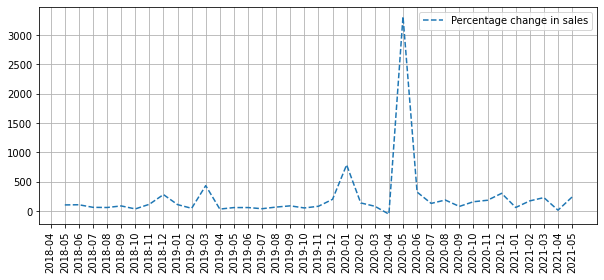

In [21]:
average = pd.DataFrame(av.mean(axis = 0) *100)
plt.figure(figsize=(10, 4))
plt.plot(average, '--', label = 'Percentage change in sales')
plt.grid()
plt.legend()
plt.xticks(rotation=90);

### **Model Approaches:**

*   **Linear Model:**

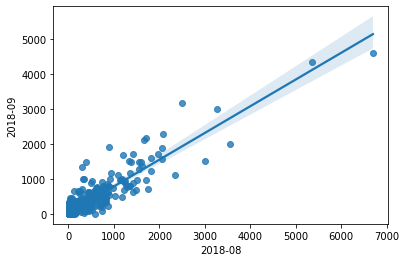

In [22]:
sns.regplot(df.iloc[:, 4], df.iloc[:, 5]);

In [23]:
x = df.iloc[:, 4].values
y = df.iloc[:, 5].values

In [24]:
slope, intercept = np.polyfit(x, y, 1)
print(f'Slope is: {slope} and Intercept is: {intercept}')

Slope is: 0.7641059332683068 and Intercept is: 24.89499085795516


* **Prepare data function:**

In [25]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]

		if seq_x[0] == 0 or seq_x[1] == 0 or seq_x[2] == 0:
			continue

		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

* **ARIMA:**

In [26]:
error = 0
for ix in range(20):
  df_new = df
  df1 = df_new.iloc[ix, :]
  df1 = df1.T
  train=df1.iloc[0:-1].astype('float32').to_numpy()
  test=df1.iloc[-1:].astype('float32').to_numpy()
  model=sm.tsa.ARIMA(train, order=(0,0,0))
  model=model.fit()
  start = len(train)
  end = len(train) + len(test) - 1
  pred = model.predict(start = start, end = end)
  error += abs((test - pred) / (test)) * 100
  print(f'row: {ix}')
  print(f'actual: {test}, predicted: {np.round(pred, 0)}')    
  print(f'mape: {abs(np.round((test - pred) / (test), 2) * 100)} %') 
  print('-' * 20)

row: 0
actual: [12.], predicted: [13.]
mape: [6.] %
--------------------
row: 1
actual: [43.], predicted: [40.]
mape: [8.] %
--------------------
row: 2
actual: [6.], predicted: [7.]
mape: [23.] %
--------------------
row: 3
actual: [18.], predicted: [88.]
mape: [391.] %
--------------------
row: 4
actual: [24.], predicted: [281.]
mape: [1069.] %
--------------------
row: 5
actual: [4.], predicted: [14.]
mape: [257.] %
--------------------
row: 6
actual: [395.], predicted: [971.]
mape: [146.] %
--------------------
row: 7
actual: [250.], predicted: [644.]
mape: [157.] %
--------------------
row: 8
actual: [67.], predicted: [218.]
mape: [225.] %
--------------------
row: 9
actual: [40.], predicted: [192.]
mape: [381.] %
--------------------
row: 10
actual: [67.], predicted: [30.]
mape: [55.] %
--------------------
row: 11
actual: [242.], predicted: [252.]
mape: [4.] %
--------------------
row: 12
actual: [1020.], predicted: [10598.]
mape: [939.] %
--------------------
row: 13
actual: [6

In [27]:
print(f'The average error over 20 rows is: {error/20}')

The average error over 20 rows is: [256.33815287]


* **Neural Network model on Timeseries data:**

In [28]:
error = 0
for ix in range(20):
  df_new = df
  df1 = df_new.iloc[ix, :]
  df1 = df1.T

  # define input sequence
  timeseries_data = df1.values
  
  # choose a number of time steps
  n_steps = 3

  # split into samples
  X, y = prepare_data(timeseries_data, n_steps)

  n_features = 1
  X = X.reshape((X.shape[0], X.shape[1], n_features))

  # define model
  model = Sequential()
  model.add(LSTM(50, return_sequences=True, input_shape=(n_steps, n_features)))
  model.add(Dropout(0.2))
  
  model.add(LSTM(50))
  model.add(Dropout(0.2))

  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')
  model.fit(X, y, epochs=150, verbose=0);

  x_input = X[-1]
  input=list(x_input)
  lst_output=[]
  i=0
  d=1
  while(i<d):
    
      if(len(input)>3):
          x_input=array(input[1:])
          x_input = x_input.reshape((1, n_steps, n_features))
          yhat = model.predict(x_input, verbose=0)
          input.append(yhat[0][0])
          input=input[1:]
          lst_output.append(yhat[0][0])
          i=i+1
      else:
          x_input = x_input.reshape((1, n_steps, n_features))
          yhat = model.predict(x_input, verbose=0)
          input.append(yhat[0][0])
          lst_output.append(yhat[0][0])
          i=i+1

  error += abs(round((df.iloc[ix, -1] - lst_output[0]) / df.iloc[ix, -1], 2) * 100)
  print(f'row: {ix}')
  print(f'actual: {df.iloc[ix, -1]}, predicted: {round(lst_output[0], 0)}')    
  print(f'mape: {abs(round((df.iloc[ix, -1] - lst_output[0]) / (df.iloc[ix, -1]), 2) * 100)} %') 
  print('-' * 20)

row: 0
actual: 12, predicted: 12.0
mape: 2.0 %
--------------------
row: 1
actual: 43, predicted: 21.0
mape: 50.0 %
--------------------
row: 2
actual: 6, predicted: 7.0
mape: 24.0 %
--------------------
row: 3
actual: 18, predicted: 22.0
mape: 24.0 %
--------------------
row: 4
actual: 24, predicted: 23.0
mape: 6.0 %
--------------------
row: 5
actual: 4, predicted: 13.0
mape: 214.0 %
--------------------
row: 6
actual: 395, predicted: 24.0
mape: 94.0 %
--------------------
row: 7
actual: 250, predicted: 23.0
mape: 91.0 %
--------------------
row: 8
actual: 67, predicted: 24.0
mape: 64.0 %
--------------------
row: 9
actual: 40, predicted: 24.0
mape: 41.0 %
--------------------
row: 10
actual: 67, predicted: 21.0
mape: 69.0 %
--------------------
row: 11
actual: 242, predicted: 22.0
mape: 91.0 %
--------------------
row: 12
actual: 1020, predicted: 24.0
mape: 98.0 %
--------------------
row: 13
actual: 65, predicted: 24.0
mape: 63.0 %
--------------------
row: 14
actual: 172, predicte

In [29]:
print(f'The average error over 20 rows is: {error/20}')

The average error over 20 rows is: 84.25


### **Final Model Approach:**

In [30]:
lst = []
for i in range(len(df)):
  lst.append(min(df.iloc[i, 12], df.iloc[i, 13]))

In [31]:
lsdf = pd.DataFrame({'col': lst})
lsdf

,col
0,19
1,64
2,8
3,84
4,321
...,...
1034,7
1035,61
1036,29
1037,13


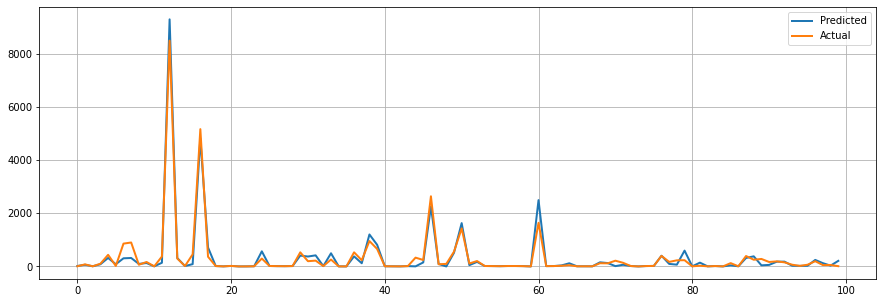

In [32]:
plt.figure(figsize=(15,5))
ax0 = lsdf.iloc[:100, 0].plot(linewidth = 2, label = 'Predicted')
ax1 = df.iloc[:100,14].plot(linewidth = 2, label = 'Actual')
plt.legend()
plt.grid()
plt.show();